In [69]:
#data processing libraries
import numpy as np
import pandas as pd

#data visualizations libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme(style='whitegrid', palette='viridis')
%matplotlib inline

import time

import os

# List Available files
import os
for dirname, _, filenames in os.walk('src/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

src/fase1_Bitcoin.csv
src/fase1_coin_Bitcoin.csv
src/fase1_cryptonews.csv
src/fase2_btc-results.csv
src/fase2_BTC_Footprints_v1.xlsx
src/fase2_miner-devices.csv


In [70]:
#First we need read the data from files that we want analyse
bitcoin_news_df = pd.read_csv('src/fase1_Bitcoin.csv')
bitcoin_prices_df = pd.read_csv('src/fase1_coin_Bitcoin.csv')
crypto_news_df = pd.read_csv('src/fase1_cryptonews.csv')

print(bitcoin_news_df.head(10))
print(bitcoin_prices_df.head(10))
print(crypto_news_df.head(10))

                                               title  score      id  \
0  Can someone help explain to me how and why a l...      1  zpi5h0   
1                                   Bitcoin is King…      2  zphp0p   
2  The FTX disaster has set back crypto by ‘years...      0  zphb0d   
3  Will the loss of more Bitcoins over time resul...      5  zph6iu   
4  Experts Say Sam Bankman-Fried's Best Legal Def...     21  zph0z1   
5              Hal Finney's Vision for Bitcoin Banks      2  zpgiog   
6  Whats the most elitist take on bitcoin you can...      0  zpgdj4   
7                 Current 30-day correlation charts?      1  zpgasm   
8  #Shorts Taylor's advice she'd give to her youn...      1  zpfmev   
9                   God gave me 2 for a reason. #BTC     70  zpfldx   

                                                 url  comms_num       created  \
0  https://www.reddit.com/r/Bitcoin/comments/zpi5...          0  1.671425e+09   
1  https://www.reddit.com/r/Bitcoin/comments/zphp...    

In [71]:
#format date time columns from each data frame
crypto_news_df['date'] = pd.to_datetime(crypto_news_df['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
crypto_news_df.dropna(subset=['date'], inplace=True)
crypto_news_df['date'] = crypto_news_df['date'].dt.strftime('%Y-%m-%d')

bitcoin_prices_df.rename(columns={'Date': 'date', 'Change %': 'change'}, inplace=True)
bitcoin_prices_df['date'] = pd.to_datetime(bitcoin_prices_df['date']).dt.strftime('%Y-%m-%d')

# Convert 'timestamp' column to datetime format
bitcoin_news_df['timestamp'] = pd.to_datetime(bitcoin_news_df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Drop rows with missing or invalid timestamps
bitcoin_news_df.dropna(subset=['timestamp'], inplace=True)

# Format 'timestamp' column to contain only date
bitcoin_news_df['date'] = bitcoin_news_df['timestamp'].dt.strftime('%Y-%m-%d')

# Drop the original 'timestamp' column
bitcoin_news_df.drop(columns=['timestamp'], inplace=True)


In [72]:
crypto_news_df.info()
bitcoin_prices_df.info()
bitcoin_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31035 entries, 0 to 31036
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       31035 non-null  object
 1   sentiment  31035 non-null  object
 2   source     31035 non-null  object
 3   subject    31035 non-null  object
 4   text       31035 non-null  object
 5   title      31035 non-null  object
 6   url        31035 non-null  object
dtypes: object(7)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    799 non-null    object
 1   Price   799 non-null    object
 2   Open    799 non-null    object
 3   High    799 non-null    object
 4   Low     799 non-null    object
 5   Vol.    799 non-null    object
 6   change  799 non-null    object
dtypes: object(7)
memory usage: 43.8+ KB
<class 'pandas.core.frame.DataFrame'>

In [73]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = df.isna().sum() / len(df)
    summary_df['count'] = df.count().values 
    summary_df['unique'] = df.nunique().values 
    return summary_df

summary(bitcoin_news_df).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,count,unique
title,object,0,0.000000,1897,992
score,int64,0,0.000000,1897,201
id,object,0,0.000000,1897,1897
url,object,902,0.475488,995,995
comms_num,int64,0,0.000000,1897,167
created,float64,0,0.000000,1897,1879
body,object,427,0.225092,1470,1464
date,object,0,0.000000,1897,12


In [74]:
bitcoin_news_df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1897.0,4.383553e+01,227.552825,-9.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,4.304000e+03
comms_num,1897.0,2.052820e+01,81.270887,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,2.125000e+03
created,1897.0,1.671178e+09,285855.329923,1.670501e+09,1.670952e+09,1.671370e+09,1.671409e+09,1.671425e+09


In [75]:
summary(crypto_news_df).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,count,unique
date,object,0,0.000000,31035,774
sentiment,object,0,0.000000,31035,3931
source,object,0,0.000000,31035,3
subject,object,0,0.000000,31035,6
text,object,0,0.000000,31035,30421
title,object,0,0.000000,31035,30962
url,object,0,0.000000,31035,31035


In [76]:
crypto_news_df.describe().T

,count,unique,top,freq
date,31035,774,2023-11-02,79
sentiment,31035,3931,"{'class': 'neutral', 'polarity': 0.0, 'subject...",6915
source,31035,3,CoinTelegraph,13008
subject,31035,6,bitcoin,9968
text,31035,30421,"Get your daily, bite-sized digest of cryptoass...",447
title,31035,30962,Is it Too Late to Buy Shiba Inu? Crypto Expert...,4
url,31035,31035,https://cryptonews.comhttps://cryptonews.com/n...,1


In [77]:
summary(bitcoin_prices_df).style.background_gradient(cmap='Purples')

,dtypes,missing#,missing%,count,unique
date,object,0,0.000000,799,799
Price,object,0,0.000000,799,795
Open,object,0,0.000000,799,795
High,object,0,0.000000,799,797
Low,object,0,0.000000,799,798
Vol.,object,0,0.000000,799,790
change,object,0,0.000000,799,533


In [78]:
bitcoin_prices_df.describe().T

,count,unique,top,freq
date,799,799,2023-12-19,1
Price,799,795,"41,929.0",2
Open,799,795,"29,912.7",2
High,799,797,"40,599.0",2
Low,799,798,"34,357.4",2
Vol.,799,790,56.24K,2
change,799,533,0.72%,6


In [79]:
summary(bitcoin_prices_df).style.background_gradient(cmap='Oranges')

,dtypes,missing#,missing%,count,unique
date,object,0,0.000000,799,799
Price,object,0,0.000000,799,795
Open,object,0,0.000000,799,795
High,object,0,0.000000,799,797
Low,object,0,0.000000,799,798
Vol.,object,0,0.000000,799,790
change,object,0,0.000000,799,533


In [80]:
def clean_change(change):
    return float(str(change)[:-1])

bitcoin_prices_df = bitcoin_prices_df[['date', 'change']]
bitcoin_prices_df['change'] = bitcoin_prices_df['change'].apply(clean_change)

bitcoin_prices_df.head()

,date,change
0,2023-12-19,-0.94
1,2023-12-18,3.12
2,2023-12-17,-2.14
3,2023-12-16,0.82
4,2023-12-15,-2.55


In [81]:
crypto_news_df.head()

,date,sentiment,source,subject,text,title,url
0,2023-12-19,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...
3,2023-12-19,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...
4,2023-12-19,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...


In [82]:
crypto_news_df.loc[0, 'sentiment']

"{'class': 'negative', 'polarity': -0.1, 'subjectivity': 0.6}"

In [83]:
def get_sentiment_verdict(data):
    data = eval(data)
    return data['class']

crypto_news_df['sentiment'] = crypto_news_df['sentiment'].apply(get_sentiment_verdict)

In [84]:
crypto_news_df.head()

,date,sentiment,source,subject,text,title,url
0,2023-12-19,negative,CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...
1,2023-12-19,neutral,CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...
2,2023-12-19,positive,CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...
3,2023-12-19,positive,CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...
4,2023-12-19,neutral,CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...


In [85]:
crypto_news_df = crypto_news_df[['date', 'sentiment', 'source', 'subject']]

In [86]:
print('Possible values:')
print(f'Sentiment: {crypto_news_df.sentiment.unique()}')
print(f'Source: {crypto_news_df.source.unique()}')
print(f'Subject: {crypto_news_df.subject.unique()}')

Possible values:
Sentiment: ['negative' 'neutral' 'positive']
Source: ['CryptoNews' 'CoinTelegraph' 'CryptoPotato']
Subject: ['altcoin' 'blockchain' 'ethereum' 'bitcoin' 'nft' 'defi']


In [87]:
#cleaning data 
crypto_news_df['negative'] = (crypto_news_df['sentiment'] == 'negative').astype(int)
crypto_news_df['neutral'] = (crypto_news_df['sentiment'] == 'neutral').astype(int)
crypto_news_df['positive'] = (crypto_news_df['sentiment'] == 'positive').astype(int)

crypto_news_df.drop(columns = ['sentiment', 'source', 'subject'], inplace=True)



In [88]:
crypto_news_df = crypto_news_df.groupby('date').sum().reset_index().sort_values(by='date')

In [89]:
crypto_news_df.sample(5)

,date,negative,neutral,positive
656,2023-08-24,13,25,33
641,2023-08-09,15,23,35
458,2023-02-07,11,17,27
757,2023-12-03,4,11,9
751,2023-11-27,13,28,25


In [91]:
# Merge crypto_news_df and bitcoin_news_df on 'date' column
merged_df = pd.merge(crypto_news_df, bitcoin_news_df, on='date', how='inner')

# Merge the resulting DataFrame with bitcoin_prices_df on 'date' column
final_df = pd.merge(merged_df, bitcoin_prices_df, on='date', how='inner')

# Drop rows with missing values
final_df.dropna(inplace=True)

# Convert 'date' column to datetime format
final_df['date'] = pd.to_datetime(final_df['date'])


In [95]:
print(final_df.head(15))
print(final_df.tail(15))

         date  negative  neutral  positive  \
1  2022-12-08        12       22        22   
2  2022-12-08        12       22        22   
4  2022-12-08        12       22        22   
5  2022-12-08        12       22        22   
6  2022-12-08        12       22        22   
7  2022-12-08        12       22        22   
9  2022-12-08        12       22        22   
10 2022-12-08        12       22        22   
11 2022-12-08        12       22        22   
12 2022-12-08        12       22        22   
13 2022-12-08        12       22        22   
14 2022-12-08        12       22        22   
15 2022-12-08        12       22        22   
16 2022-12-08        12       22        22   
19 2022-12-08        12       22        22   

                                                title  score      id  \
1   These On-Chain Indicators Suggest Bitcoin's Bo...      2  zgc2i3   
2                                              mynode      5  zgavx7   
4             Question about testing your seed 

D:\programs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\programs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


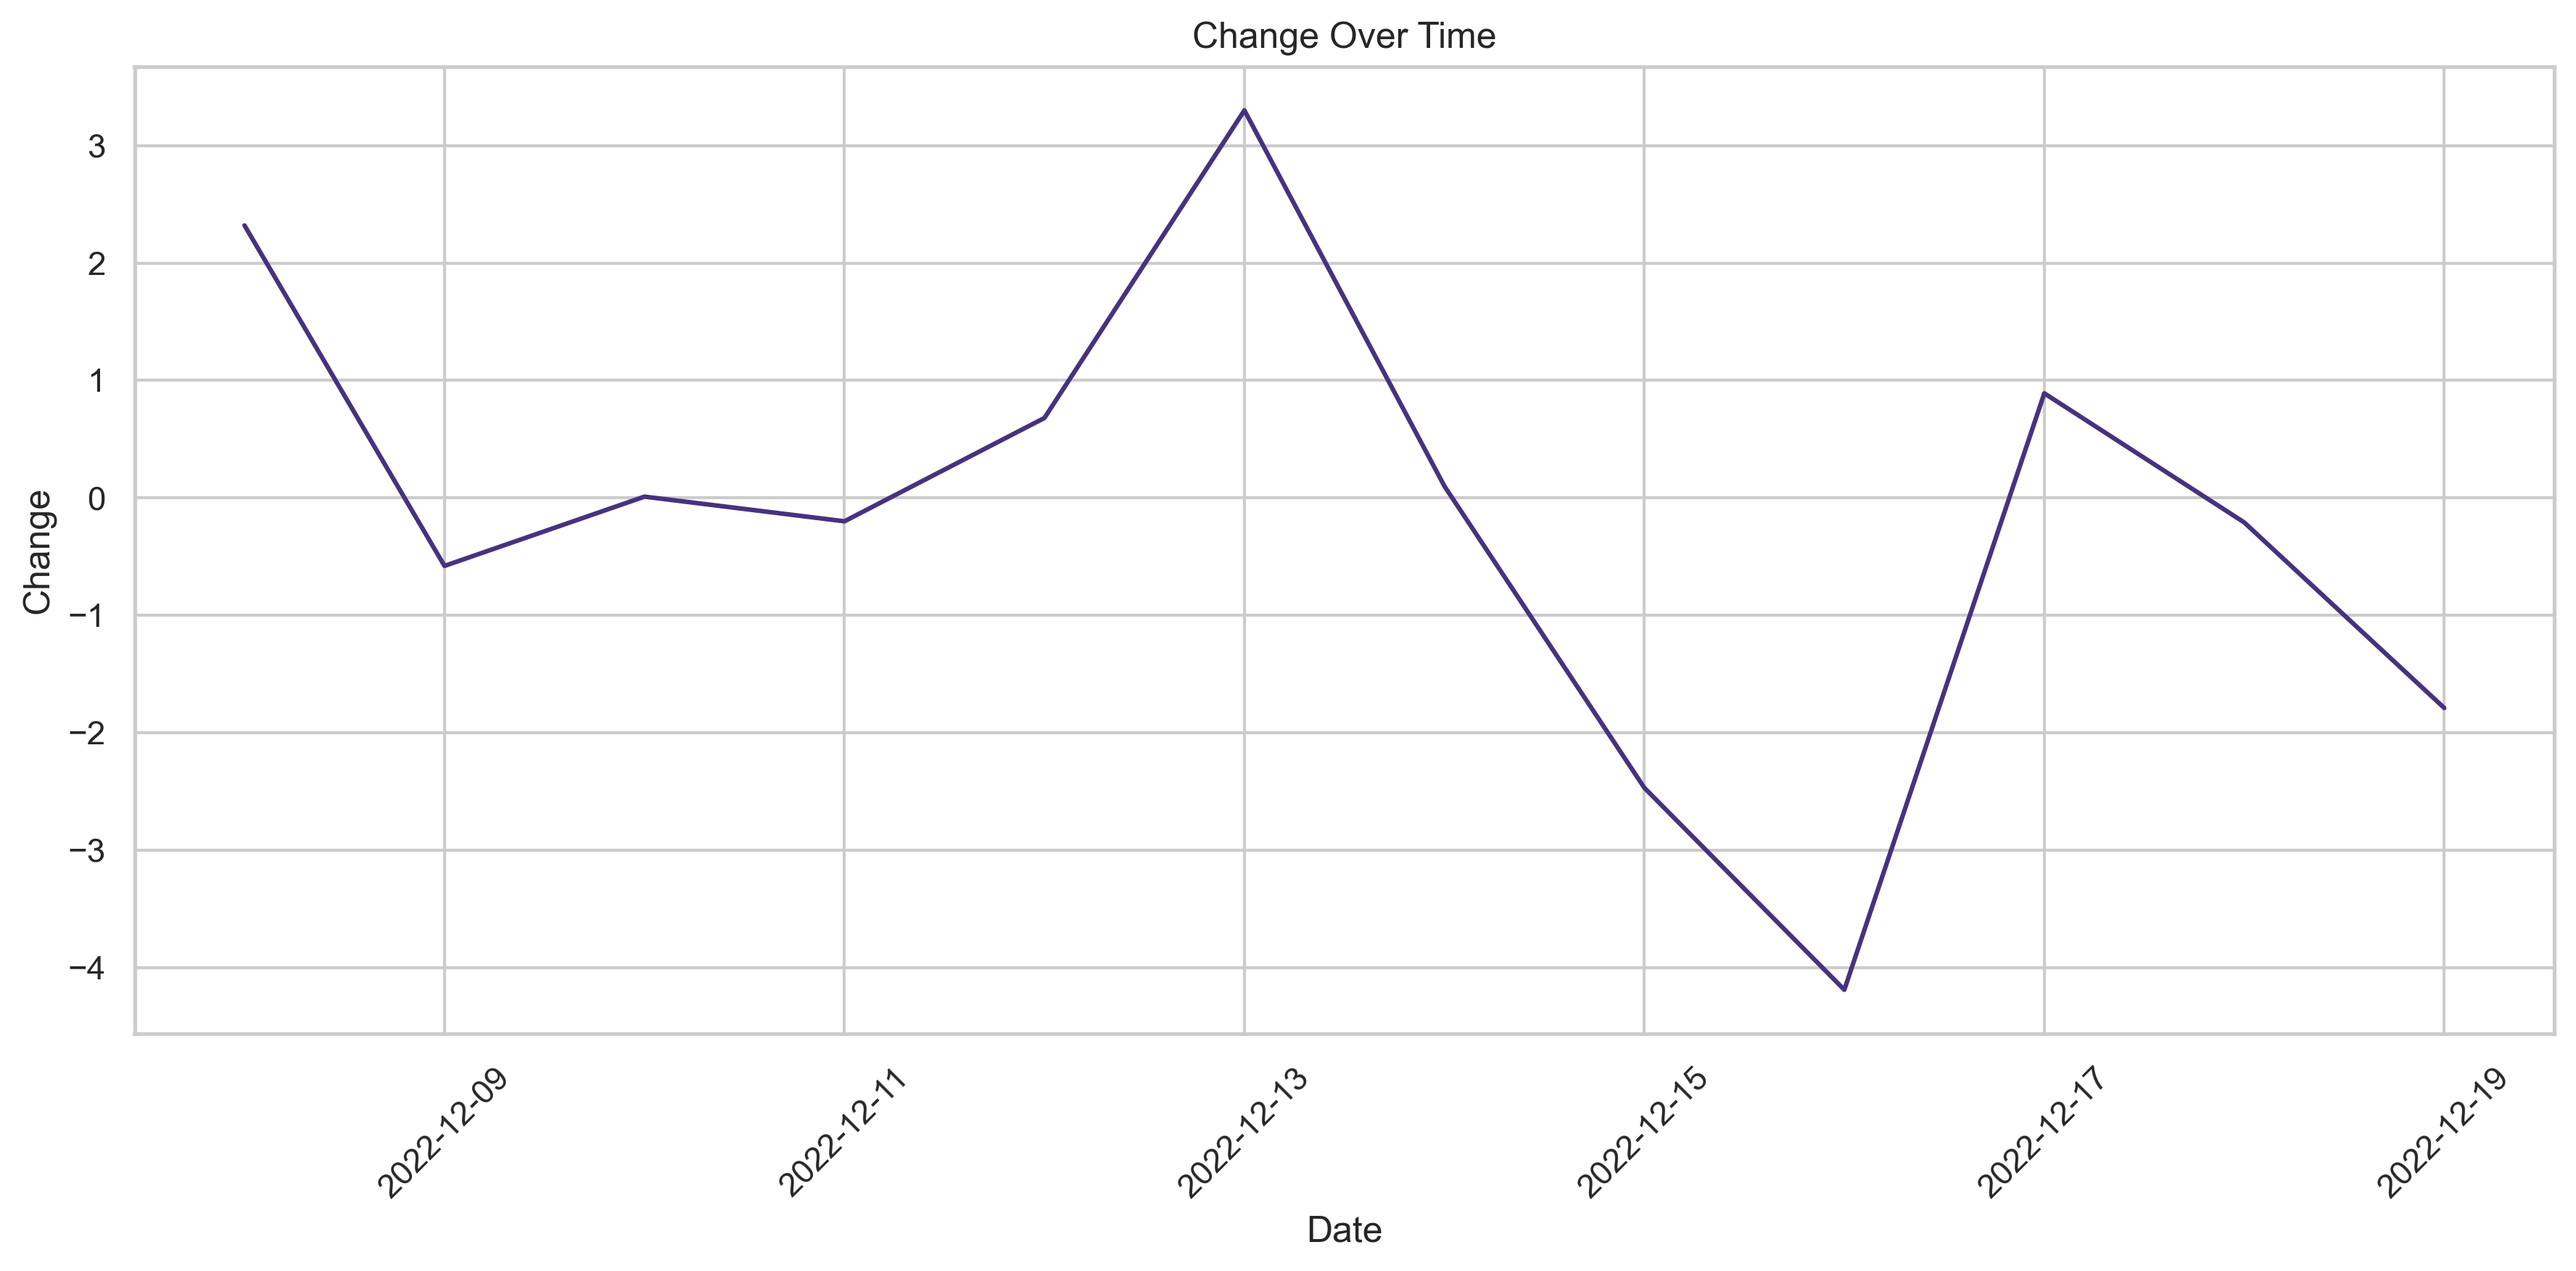

In [97]:
#expploring some analysis
plt.figure(figsize=(12, 6), dpi=300)
sns.lineplot(x='date', y='change', data=final_df)
plt.title('Change Over Time')
plt.xlabel('Date')
plt.ylabel('Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

D:\programs\anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


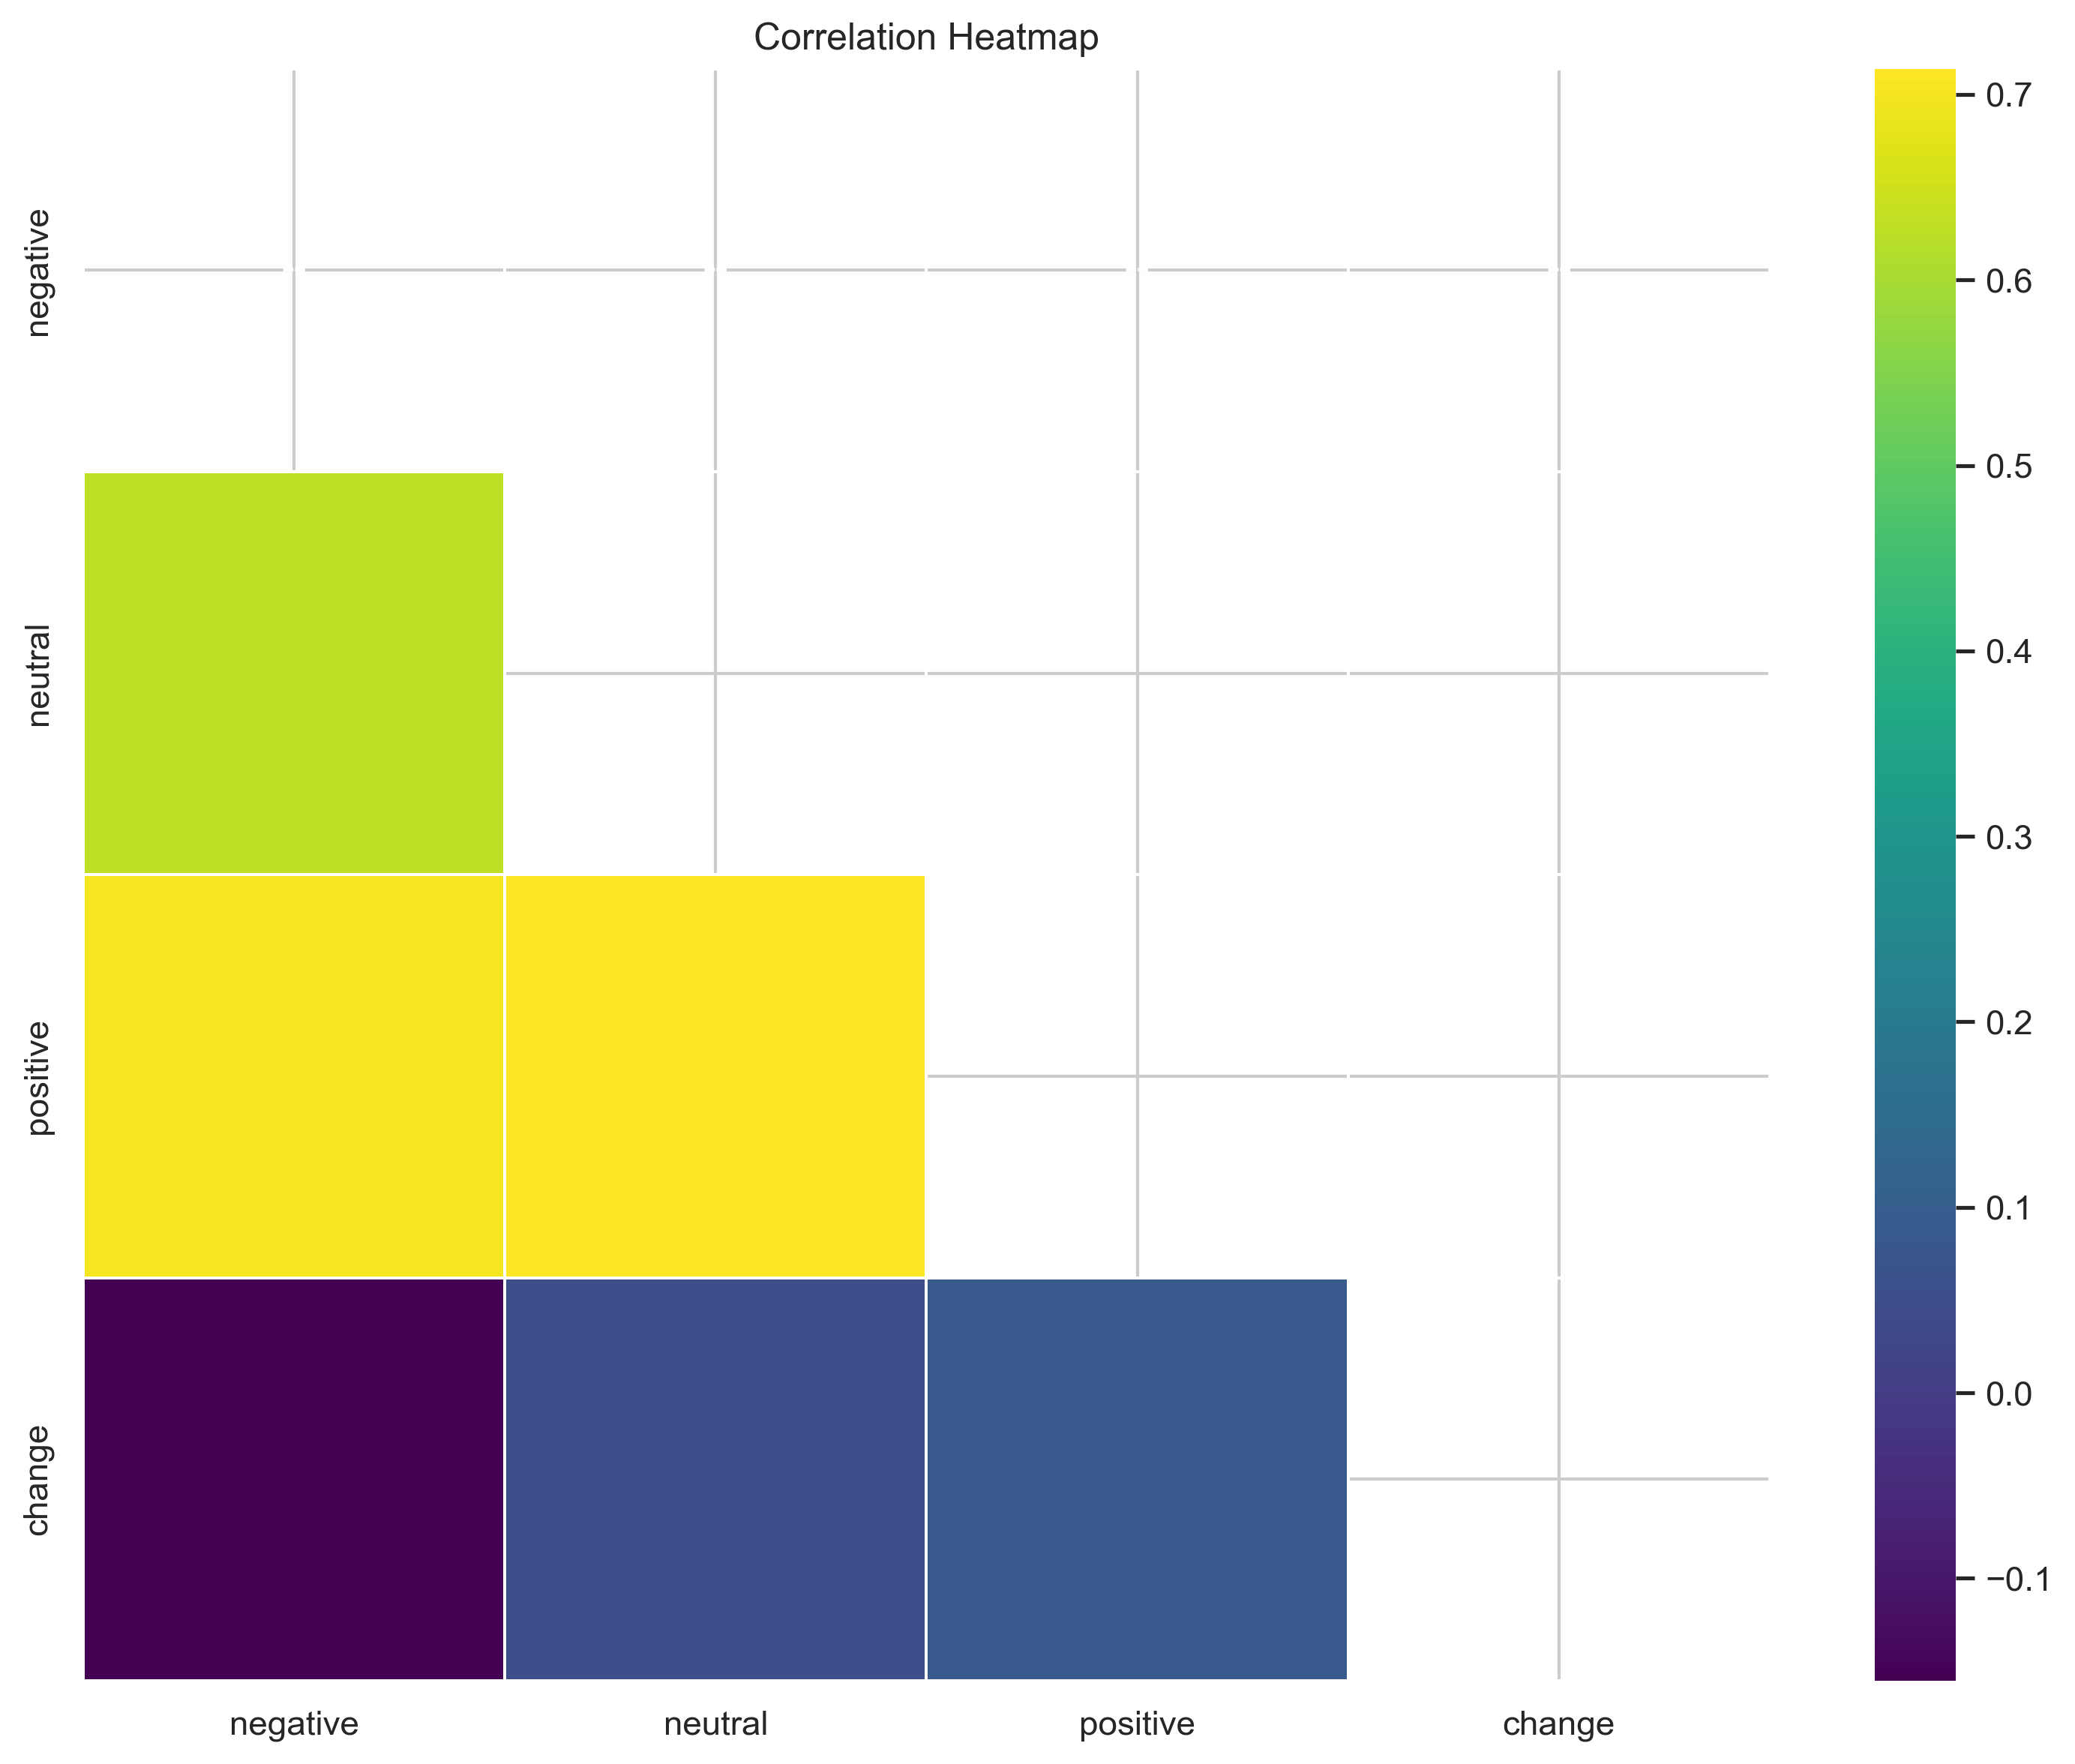

In [107]:
# Compute correlation matrix
corr_matrix = final_df[['negative', 'neutral', 'positive', 'change']].corr()

# Create heatmap with annotations formatted as floating-point numbers with two decimal places
plt.figure(figsize=(10, 8), dpi=300)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', mask=mask, linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

D:\programs\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


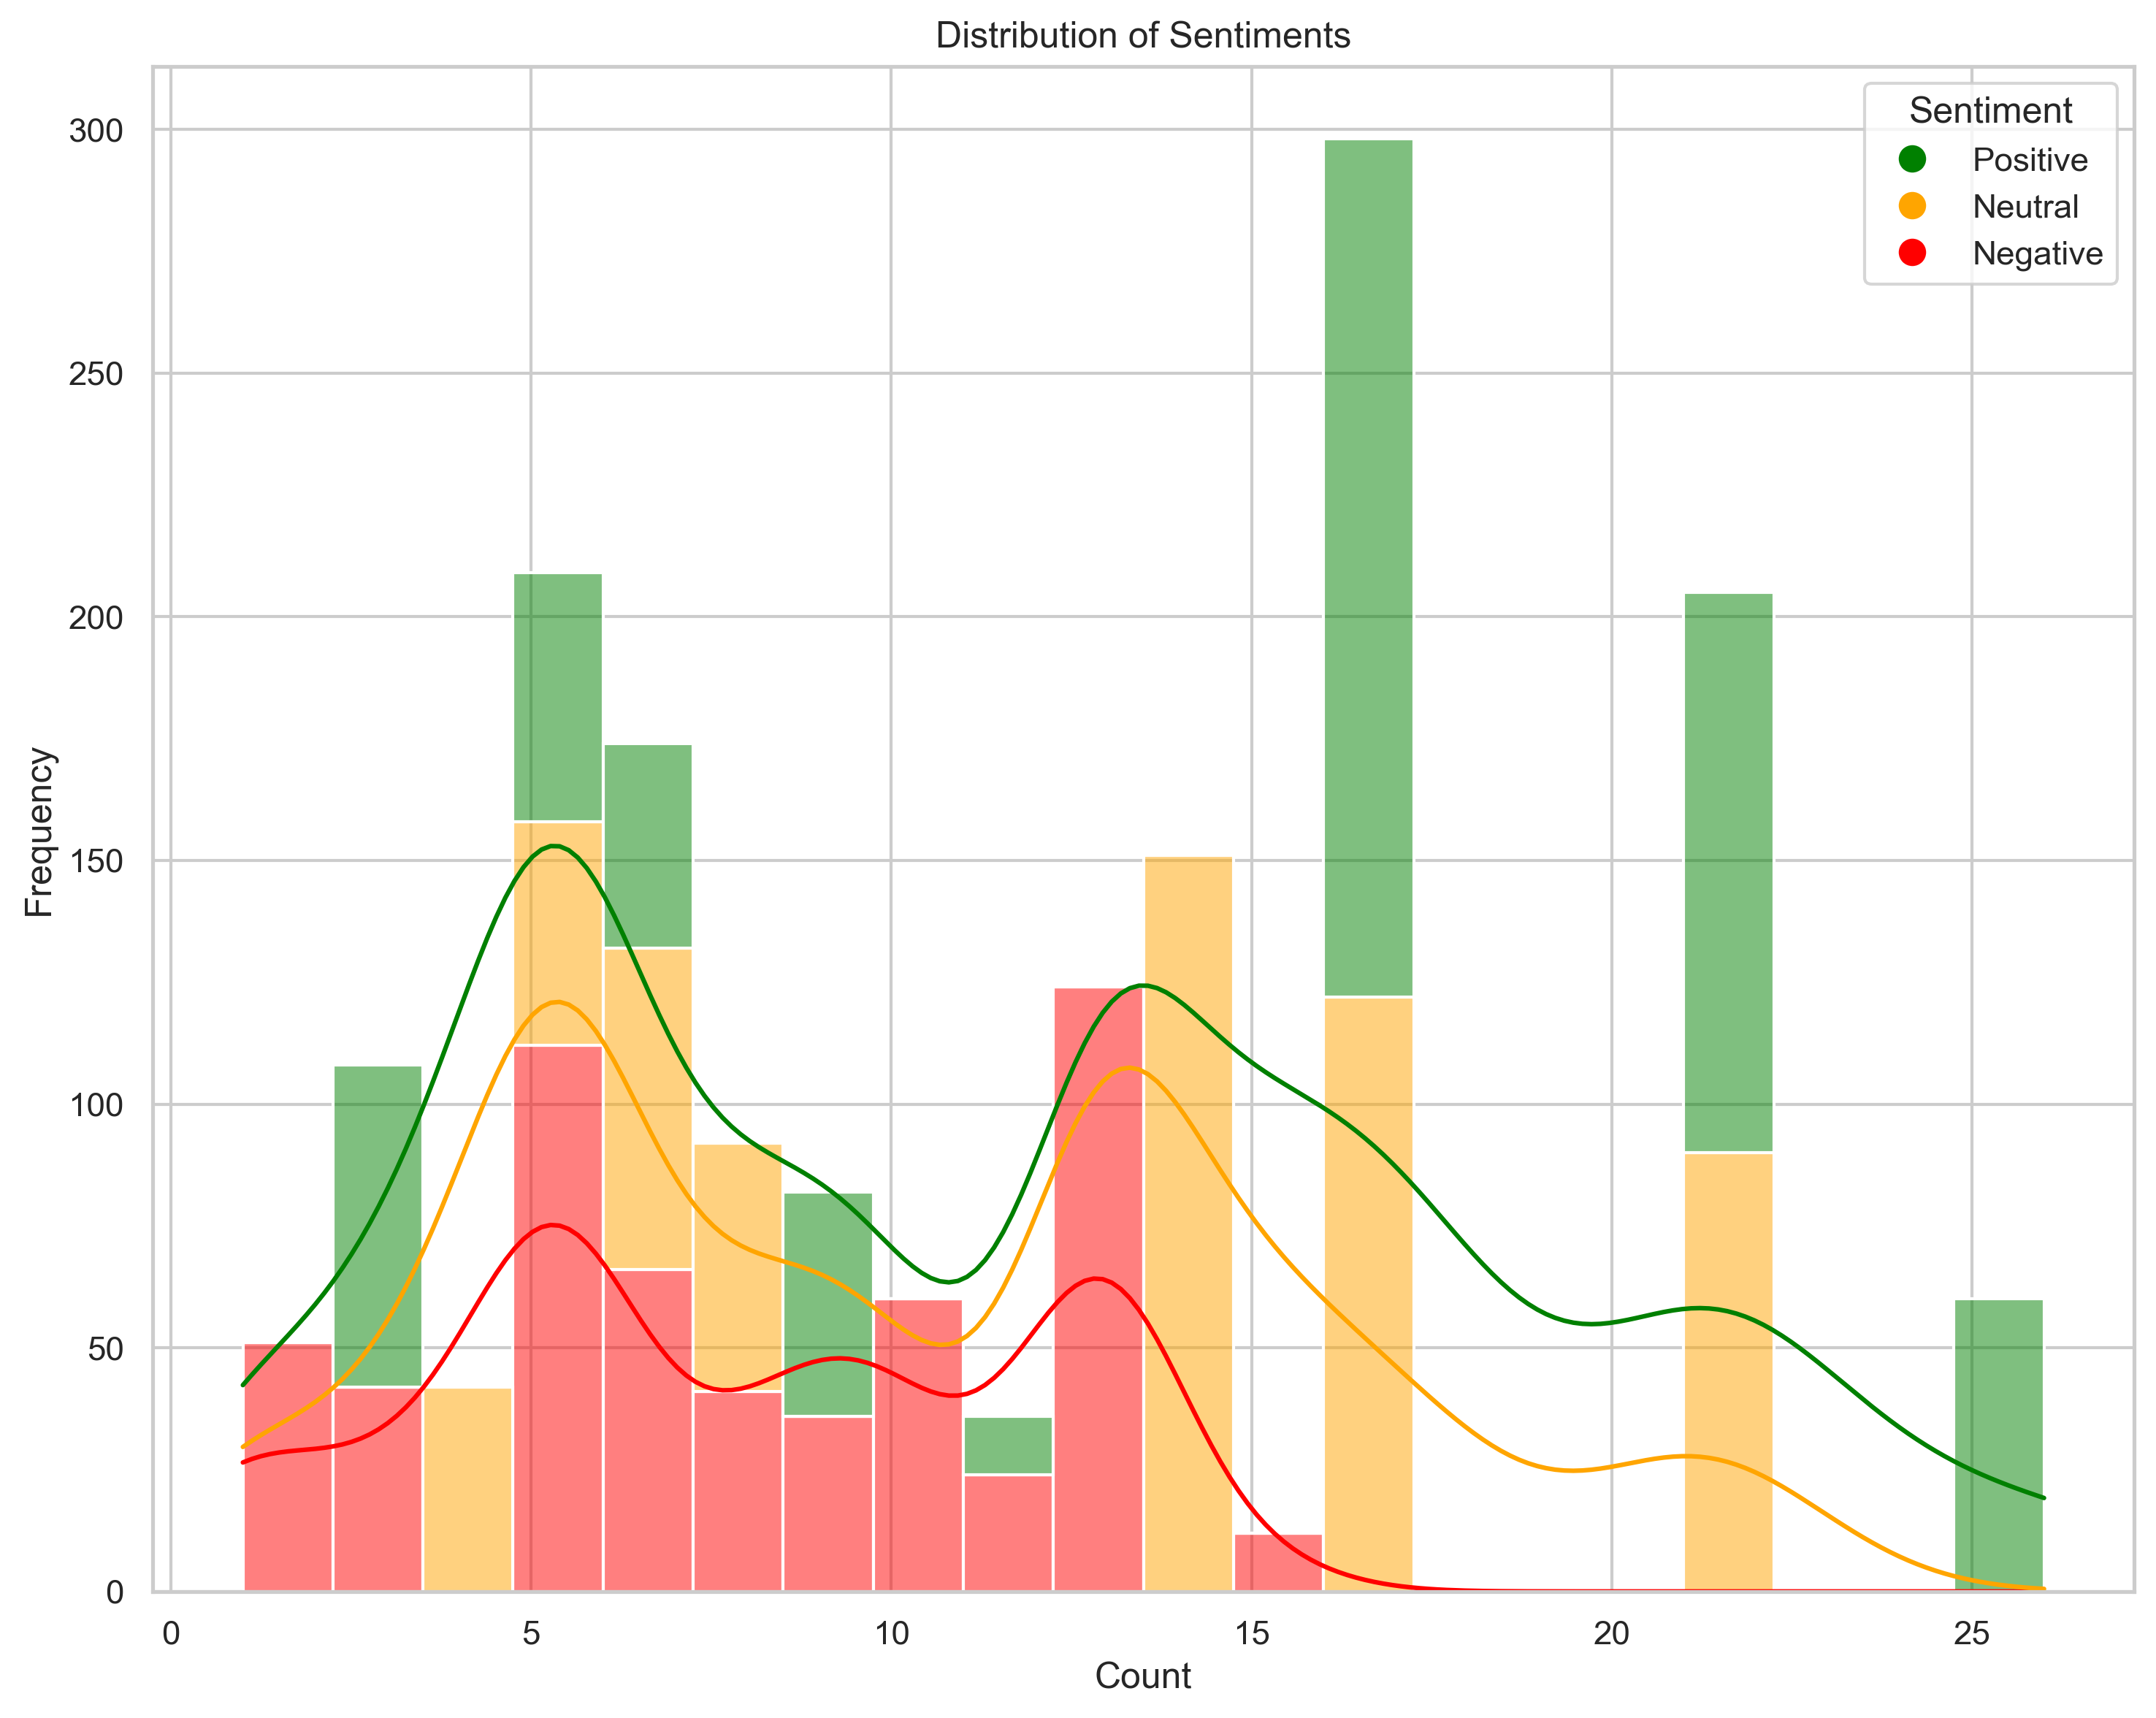

In [109]:
# Replace infinite values with NaN
final_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Melt the DataFrame to get the count of sentiments
melted_df = pd.melt(final_df[['positive', 'neutral', 'negative']], var_name='Sentiment', value_name='Count')
colors = {'positive': 'green', 'neutral': 'orange', 'negative': 'red'}

# Create a new plot
plt.figure(figsize=(10, 8), dpi=300)

# Create histogram plot
sns.histplot(data=melted_df, x='Count', hue='Sentiment', multiple='stack', bins=20, kde=True, palette=colors)

# Distribution sentiment counter
plt.title('Distribution of Sentiments')
plt.xlabel('Count')
plt.ylabel('Frequency')

# Create legend labels
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[sentiment], markersize=10, label=sentiment.capitalize()) for sentiment in colors.keys()]
plt.legend(handles=legend_labels, title='Sentiment')
plt.tight_layout()
plt.show()